## Notas de aula: Álgebra Linear, Autor: Jonas Maziero, Departamento de Física, UFSM

In [23]:
%run init.ipynb
%run 03_operators.ipynb

# Funções matriciais de matrizes
Já vimos algumas funções escalares de operadores/matrizes, como por exemplo o determinante, o traço, o produto interno e a norma. Aqui veremos como devemos proceder para calcular funções de operadores que nos retornam operadores, como por exemplo $\log(\cdot)$, $\exp(\cdot)$, $\sqrt{\cdot}$, etc.

_OBS._ A primeira observação a se fazer aqui é que nossa intuição de como aplicar funções matriciais em matrizes está, em geral, errada, ou seja, se $A=(A_{j,k})$, em geral a função da matriz não é obtida aplicando-a em cada um dos elementos da matriz, i.e.,
\begin{equation}
f(A)\ne(f(A_{j,k})).
\end{equation}

## Definição de $f(A)$
Seja $A:\mathcal{H}\rightarrow\mathcal{H}$ um operador linear e seja
\begin{equation}
f(x)=\sum_{j=0}^{\infty}\left(\frac{1}{j!}\frac{d^{j}f(x)}{dx^{j}}\right)x^{j}
\end{equation}
a expansão em série de Taylor para a função escalar $f(x)$. A função $f$ tendo operadores lineares como argumento é calculada substituíndo-se, na série de Taylor, o escalar $x$ pelo operador linear correspondente.
### Exemplo
Como $e^{x}=\sum_{j=0}^{\infty}x^{j}/j!=1+x+x^{2}/2+x^{3}/3!+\cdots$, teremos
\begin{equation}
e^{A}=\mathbb{I}_{\mathcal{H}}+A+\frac{A^{2}}{2}+\frac{A^{3}}{3!}+\cdots,
\end{equation}
onde $A^{j}$ é a composição $A\circ A\circ\cdots$ por $j$ vezes.

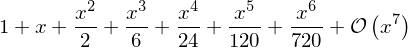

In [31]:
# para expandir uma função em séries de Taylor no sympy
x = symbols("x")
exp(x).series(x, x0=0, n = 7)

### Exemplo: $e^{i\theta\vec{n}\cdot\vec{\sigma}}=\sigma_{0}\cos\theta+i\vec{n}\cdot\vec{\sigma}\sin\theta$
Para $\{\sigma_{j}\}_{j=1}^{3}$ sendo as matrizes de Pauli e $\vec{n}\in\mathbb{R}^{3}$, definimos
\begin{equation}
\vec{n}\cdot\vec{\sigma} = \vec{n}^{T}\vec{\sigma}:=\begin{bmatrix}n_{1} & n_{2} & n_{3}\end{bmatrix}\begin{bmatrix}\sigma_{1} \\ \sigma_{2} \\ \sigma_{3}\end{bmatrix} = \sum_{j=1}^{3}n_{j}\sigma_{j}.
\end{equation}

Para o resultado que provaremos na sequência, utilizaremos a seguinte indentidade:
\begin{align}
(\vec{n}\cdot\vec{\sigma})^{2} & = \sum_{j=1}^{3}n_{j}\sigma_{j}\sum_{k=1}^{3}n_{k}\sigma_{k} = \sum_{j,k=1}^{3}n_{j}n_{k}\sigma_{j}\sigma_{k} = \sum_{j,k=1}^{3}n_{j}n_{k}(\delta_{j,k}\sigma_{0}+sgn(j,k,l)i\sigma_{l}) \\
& = \sum_{j=1}^{3}n_{j}^{2}\sigma_{0} + \sum_{j\ne k}n_{j}n_{k}sgn(j,k,l)i\sigma_{l} \\
& = ||\vec{n}||^{2}\sigma_{0} + n_{1}n_{2}sgn(1,2,3)i\sigma_{3}+n_{2}n_{1}sgn(2,1,3)i\sigma_{3} \\
&+ n_{1}n_{3}sgn(1,3,2)i\sigma_{2}+n_{3}n_{1}sgn(3,1,2)i\sigma_{2} + n_{2}n_{3}sgn(2,3,1)i\sigma_{1}+n_{3}n_{2}sgn(3,2,1)i\sigma_{1} \\
& = ||\vec{n}||^{2}\sigma_{0} + (n_{1}n_{2}-n_{2}n_{1})i\sigma_{3} + (-n_{1}n_{3}+n_{3}n_{1})i\sigma_{2} + (n_{2}n_{3}-n_{3}n_{2})i\sigma_{1} \\
& = ||\vec{n}||^{2}\sigma_{0}.
\end{align}
Agora, para $||\vec{n}||=1$, $\theta\in\mathbb{R}$ e $\sigma_{0}=\mathbb{I}_{\mathbb{C}_{2}}$, usamos a série de Taylor para a exponencial e $(\vec{n}\cdot\vec{\sigma})^{2}=\sigma_{0}$ para obter:
\begin{align}
e^{i\theta\vec{n}\cdot\vec{\sigma}} & = \sum_{j=0}^{\infty}\frac{(i\theta\vec{n}\cdot\vec{\sigma})^{j}}{j!} \\
& = \sigma_{0} + i\theta\vec{n}\cdot\vec{\sigma} + \frac{(i\theta\vec{n}\cdot\vec{\sigma})^{2}}{2!} + \frac{(i\theta\vec{n}\cdot\vec{\sigma})^{3}}{3!} + \frac{(i\theta\vec{n}\cdot\vec{\sigma})^{4}}{4!} + \frac{(i\theta\vec{n}\cdot\vec{\sigma})^{5}}{5!} + \cdots \\
& = \sigma_{0} + i\theta\vec{n}\cdot\vec{\sigma} - \frac{\theta^{2}\sigma_{0}}{2!} - \frac{i\theta^{3}\vec{n}\cdot\vec{\sigma}}{3!} + \frac{\theta^{4}\sigma_{0}}{4!} + \frac{i\theta^{5}\vec{n}\cdot\vec{\sigma}}{5!} + \cdots \\
& = \sigma_{0}(1- \frac{\theta^{2}}{2!} + \frac{\theta^{4}}{4!} -\cdots) + i\vec{n}\cdot\vec{\sigma}(\theta  - \frac{\theta^{3}}{3!}  + \frac{\theta^{5}}{5!} - \cdots) \\
& = \sigma_{0}\cos\theta+i\vec{n}\cdot\vec{\sigma}\sin\theta.
\end{align}

## Fórmula de Baker-Campbell-Hausdorff
Para $c\in\mathbb{C}$ e $A,B:\mathcal{H}\rightarrow\mathcal{H}$ segue que
\begin{equation}
e^{cB}Ae^{-cB} = A + c[B,A] + \frac{c^{2}}{2!}[B,[B,A]] + \frac{c^{3}}{3!}[B,[B,[B,A]]] + \cdots.
\end{equation}
Vamos verificar essa igualdade expandindo a exponencial em série de Taylor:
\begin{align}
e^{cB}Ae^{-cB} & = \left(\sum_{j=0}^{\infty}\frac{(cB)^{j}}{j!}\right)A\left(\sum_{k=0}^{\infty}\frac{(-cB)^{k}}{k!}\right) \\
               & = \left(\mathbb{I} + cB + \frac{c^{2}B^{2}}{2} + \frac{c^{3}B^{3}}{3!} + \cdots\right)
                   A \left(\mathbb{I} - cB + \frac{c^{2}B^{2}}{2} - \frac{c^{3}B^{3}}{3!} + \cdots\right) \\
               & = A + cBA - cAB + \frac{c^{2}B^{2}}{2}A + A\frac{c^{2}B^{2}}{2} - \frac{2}{2}cBAcB - \frac{c^{2}B^{2}}{2}AcB + cBA\frac{c^{2}B^{2}}{2} + \frac{c^{3}B^{3}}{3!}A - A\frac{c^{3}B^{3}}{3!} + \cdots \\
               & = A + c[B,A] + \frac{c^{2}}{2}(BBA + ABB - 2BAB) + \frac{c^{3}}{3!}(BBBA - ABBB + 3BABB - 3BBAB) + \cdots \\
               & = A + c[B,A] + \frac{c^{2}}{2}(B(BA-AB) + (AB-BA)B) + \frac{c^{3}}{3!}(BB(BA-AB) - (AB-BA)BB + 2B(ABB - BAB)) + \cdots \\
               & = A + c[B,A] + \frac{c^{2}}{2}(B[B,A] - [B,A]B) + \frac{c^{3}}{3!}(BB[B,A] + [B,A]BB - 2B[B,A]B)) + \cdots \\
               & = A + c[B,A] + \frac{c^{2}}{2}[B,[B,A]] + \frac{c^{3}}{3!}(B(B[B,A]-[B,A]B) + ([B,A]B-B[B,A])B) + \cdots \\
               & = A + c[B,A] + \frac{c^{2}}{2}[B,[B,A]] + \frac{c^{3}}{3!}(B[B,[B,A]] - [B,[B,A]B) + \cdots \\
               & = A + c[B,A] + \frac{c^{2}}{2!}[B,[B,A]] + \frac{c^{3}}{3!}[B,[B,[B,A]]] + \cdots.
\end{align}

### Exemplo
Para
\begin{equation}
A = \sigma_{x} = \begin{bmatrix} 0&1\\1&0 \end{bmatrix} \text{ e } B = \sigma_{z}=\begin{bmatrix} 1&0\\0&-1 \end{bmatrix},
\end{equation}
temos
\begin{equation}
[\sigma_{z},\sigma_{x}]=2i\sigma_{y}\text{ e }[\sigma_{z},\sigma_{y}]=-2i\sigma_{x}.
\end{equation}
Assim
\begin{align}
e^{c\sigma_{z}}\sigma_{x}e^{-c\sigma_{z}} 
& = \sigma_{x} + c[\sigma_{z},\sigma_{x}] + \frac{c^{2}}{2}[\sigma_{z},[\sigma_{z},\sigma_{x}]] + \frac{c^{3}}{3!}[\sigma_{z},[\sigma_{z},[\sigma_{z},\sigma_{x}]]] \\ 
& + \frac{c^{4}}{4!}[\sigma_{z},[\sigma_{z},[\sigma_{z},[\sigma_{z},\sigma_{x}]]]] + \frac{c^{5}}{5!}[\sigma_{z},[\sigma_{z},[\sigma_{z},[\sigma_{z},[\sigma_{z},\sigma_{x}]]]]] + \cdots \\
& = \sigma_{x} + c2i\sigma_{y} + \frac{c^{2}}{2}2i[\sigma_{z},\sigma_{y}] + \frac{c^{3}}{3!}2i[\sigma_{z},[\sigma_{z},\sigma_{y}]] + \frac{c^{4}}{4!}2i[\sigma_{z},[\sigma_{z},[\sigma_{z},\sigma_{y}]]] + \frac{c^{5}}{5!}2i[\sigma_{z},[\sigma_{z},[\sigma_{z},[\sigma_{z},\sigma_{y}]]]] + \cdots \\
              & = \sigma_{x} + c2i\sigma_{y} - \frac{c^{2}}{2}4i^{2}\sigma_{x} - \frac{c^{3}}{3!}4i^{2}[\sigma_{z},\sigma_{x}] - \frac{c^{4}}{4!}4i^{2}[\sigma_{z},[\sigma_{z},\sigma_{x}]] - \frac{c^{5}}{5!}4i^{2}[\sigma_{z},[\sigma_{z},[\sigma_{z},\sigma_{x}]]] + \cdots \\
              & = \sigma_{x} + c2i\sigma_{y} - \frac{(2ic)^{2}}{2}\sigma_{x} - \frac{c^{3}}{3!}8i^{3}\sigma_{y} - \frac{c^{4}}{4!}8i^{3}[\sigma_{z},\sigma_{y}] - \frac{c^{5}}{5!}8i^{3}[\sigma_{z},[\sigma_{z},\sigma_{y}]] + \cdots \\
              & = \sigma_{x} + c2i\sigma_{y} - \frac{(2ic)^{2}}{2}\sigma_{x} - \frac{c^{3}}{3!}8i^{3}\sigma_{y} + \frac{c^{4}}{4!}16i^{4}\sigma_{x} + \frac{c^{5}}{5!}16i^{4}[\sigma_{z},\sigma_{x}] + \cdots \\
              & = \sigma_{x} + c2i\sigma_{y} - \frac{(2ic)^{2}}{2}\sigma_{x} - \frac{(2ic)^{3}}{3!}\sigma_{y} + \frac{(2ic)^{4}}{4!}\sigma_{x} + \frac{(2ic)^{5}}{5!}\sigma_{y} + \cdots \\
              & = \sigma_{x}\left(1 - \frac{(2ic)^{2}}{2!} +\frac{(2ic)^{4}}{4!} + \cdots\right) + \sigma_{y}\left(2ci  - \frac{(2ic)^{3}}{3!} + \frac{(2ic)^{5}}{5!} + \cdots\right)  \\
              & = \sigma_{x}\cos(2ic) + \sigma_{y}\sin(2ic).
\end{align}

__Exercício:__ Utilize a fórmula de BCH para calcular $e^{c\sigma_{x}}\sigma_{y}e^{-c\sigma_{x}}$.

In [24]:
def BCH(c,B,A,order):
    terms = []
    term = A
    co = A
    bch = term
    terms.append(term)
    for j in range(1,order):
        co = comm(B,co)
        term = pow(c,j)*co/fact(j)
        bch += term
        terms.append(term)
    return bch, terms

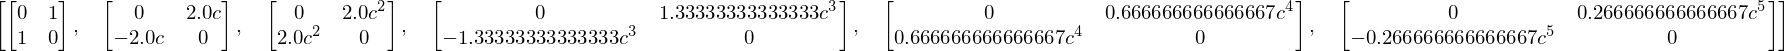

In [26]:
#A = Symbol("A", commutative = False)
#B = Symbol("B", commutative = False)
A = pauli(1)
B = pauli(3)
order = 6
bch, terms = BCH(c,B,A,order)
simplify(terms)

# Definição de $f(A)$ para operadores normais
Se
\begin{equation}
A=\sum_{a}aP_{a}
\end{equation}
é a decomposição espectral do operador linear normal $A$, então suas funções podem ser calculadas usando
\begin{equation}
f(A):=\sum_{a}f(a)P_{a}.
\end{equation}
Ou seja, depois de obter a decomposição espectral de $A$, atuamos a função nos seus autovalores.

## Equivalência entre as definições para $A=A^{\dagger}$
Vamos verificar que essa definição é equivalente à definição principal via séries de Taylor. Como mostrado por Taylor, se decompomos uma função escalar qualquer em termos de potências de $x$:
\begin{equation}
f(x)=\sum_{j=0}^{\infty}c_{j}x^{j},
\end{equation}
os coeficientes são dados como na série de Maclaurin, i.e., $c_{j}=\frac{1}{j!}\frac{d^{j}f(x)}{dx^{j}}$. Assim, como
\begin{align}
A^{j} &= AAA\cdots = \sum_{a}aP_{a}\sum_{a'}a'P_{a'}\sum_{a''}a''P_{a''}\cdots \\
& = \sum_{a,a',a'',\cdots}aa'a''\cdots P_{a}P_{a'}P_{a''}\cdots = \sum_{a,a',a'',\cdots}aa'a''\cdots \delta_{aa'}\delta_{a'a''}\cdots P_{a} \\
& = \sum_{a}a^{j}P_{a},
\end{align}
teremos que
\begin{align}
f(A) & = \sum_{j=0}^{\infty}c_{j}A^{j} = \sum_{j=0}^{\infty}c_{j}\sum_{a}a^{j}P_{a} = \sum_{a}\left(\sum_{j=0}^{\infty}c_{j}a^{j}\right)P_{a} \\
& = \sum_{a}f(a)P_{a}.
\end{align}

### Exemplo
\begin{align}
e^{A} & = \mathbb{I}_{\mathcal{H}}+A+\frac{A^{2}}{2}+\frac{A^{3}}{3!}+\cdots \\
& = \sum_{a}P_{a} + \sum_{a}aP_{a} + \frac{\sum_{a}aP_{a}\sum_{a'}a'P_{a'}}{2}+\frac{\sum_{a}aP_{a}\sum_{a'}a'P_{a'}\sum_{a''}a''P_{a''}}{3!}+\cdots \\
& = \sum_{a}P_{a} + \sum_{a}aP_{a} + \frac{\sum_{a,a'}aa'P_{a}P_{a'}}{2}+\frac{\sum_{a,a',a''}aa'a''P_{a}P_{a'}P_{a''}}{3!}+\cdots \\
& = \sum_{a}P_{a} + \sum_{a}aP_{a} + \frac{\sum_{a}a^{2}P_{a}}{2}+\frac{\sum_{a}a^{3}P_{a}}{3!}+\cdots \\
& = \sum_{a}(1+a+\frac{a^{2}}{2}+\frac{a^{3}}{3!}+\cdots)P_{a} \\
& = \sum_{a}e^{a}P_{a}.
\end{align}

#### Sobre $\sqrt{A}$
Em geral $\sqrt{A}$ não é bem ou unicamente definida. 
Para operadores normais podemos ver que definimos $\sqrt{A}=\sum_{a}\sqrt{a}P_{a}$ então $\sqrt{A}\sqrt{A}=\sum_{a}\sqrt{a}P_{a}\sum_{a'}\sqrt{a'}P_{a'}=\sum_{a,a'}\sqrt{a}\sqrt{a'}P_{a}P_{a'} =\sum_{a,a'}\sqrt{a}\sqrt{a'}\delta_{a,a'}P_{a} = \sum_{a}aP_{a} = A$.

__Exercício:__ Verifique que qualquer operador Hermitiano e unitário é a raiz quadrada do operador identidade.

__Exercício:__ Calcule $\sqrt{\sigma_{y}}$.

In [29]:
def mat_func(A,func): # retorna exp(A) ou sqrt(A) de um operador normal 
    eig = A.eigenvects()
    d = A.shape[0]
    A_func = zeros(d,d)
    ne = 0
    j = 0
    lk = 0
    while ne < d:
        mult = eig[j][1] # multiplicidade
        ne += mult # número de autovalores considerados até então
        for k in range(0,mult):
            Proj = proj(eig[j][2][k])
            if func == 'sqrt':
                A_func += sqrt(eig[j][0])*(Proj/trace(Proj))
            elif func == 'exp':
                A_func += exp(eig[j][0])*(Proj/trace(Proj))
        j += 1
    return A_func

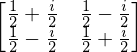

In [30]:
A = pauli(1)
#a,b,c,d = symbols("a b c d")
#A = Matrix([[a,b],[c,d]])
mat_func(A,'sqrt')

## Exemplo de aplicação: Entropia de von Neumann
O estado de uma sistema física pode ser descrito por uma matriz positiva com traço igual a um, a chamada matriz densidade. Considere a decomposição espectral de $\rho=\sum_{r}rP_{r}$, com $P_{r}$ sendo projetores 1D. A entropia de von Neumann dessa matriz é definida e dada por:
\begin{align}
S(\rho) &= -Tr(\rho\log_{2}(\rho)) = -Tr\left(\rho\log_{2}\left(\sum_{r}rP_{r}\right)\right) = -Tr\left(\left(\sum_{r'}r'P_{r'}\right)\left(\sum_{r}\log_{2}(r)P_{r}\right)\right) \\
& = -Tr\left(\sum_{r',r}r'\log_{2}(r)P_{r'}P_{r}\right) = -Tr\left(\sum_{r',r}r'\log_{2}(r)\delta_{rr'}P_{r}\right) = -\sum_{r}r\log_{2}(r)Tr(P_{r}) \\
& = -\sum_{r}r\log_{2}(r)\sum_{r'}(|r'\rangle,P_{r}(|r'\rangle)) = -\sum_{r}r\log_{2}(r)\sum_{r'}(|r'\rangle,\langle r|r'\rangle|r\rangle) \\
& = -\sum_{r}r\log_{2}(r)\sum_{r'}\delta_{r,r'}(|r'\rangle,|r\rangle) = -\sum_{r}r\log_{2}(r)\langle r|r\rangle \\
& = -\sum_{r}r\log_{2}(r),
\end{align}
que é a chamada entropia de Shannon da distribuição de probabilidades $\{r\}$ (os autovalores de $\rho$).

__Exercício:__ Verifique que a entropia de von Neumann de $\rho=|\psi\rangle\langle\psi|$ é nula.

__Exercício:__ Verifique que a entropia de von Neumann de $\rho=d^{-1}\mathbb{I}_{d}$ é $\log_{2}(d)$.

In [96]:
# Outside this function, initialize: evals = zeros(d,1)
def eVals(A):
    d = A.shape[0]
    eig = A.eigenvects()
    ne = 0
    j = 0
    lk = 0
    while ne < d:
        mult = eig[j][1]
        ne += mult
        nk = lk + mult
        for k in range(lk,nk):
            evals[k] = eig[j][0]
        lk = nk
        j += 1
    return evals

In [97]:
def shannon(pv):
    d = pv.shape[0]
    H = 0
    for j in range(d):
        if isinstance(pv[j], sympy.Expr)==False and pv[j] < 1.e-15 and pv[j] > (1.0-1.e-15):
            continue
        else:
            H -= pv[j]*log(pv[j],2)
    return H

In [98]:
def von_neumann(rho):
    d = rho.shape[0]
    evals = zeros(d,1)
    evals = eVals(rho)
    return shannon(evals)

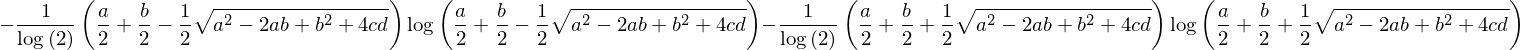

In [108]:
a, b, c, d = symbols("a b c d"); rho = Matrix([[a,c],[d,b]])
#rho = Matrix([[1/2,0],[0,1/2]])
evals = zeros(rho.shape[0],1); von_neumann(rho)

__Exercício:__ Para $H=\sum_{h}hP_{h}$, com $P_{h}$ um projetor 1D e $\beta\in\mathbb{R}$, calcule a expressão (decomposição espectral) para o estado térmico de Gibbs:
\begin{equation}
\rho_{g}=\frac{e^{-\beta H}}{Z}.
\end{equation}
Use $Tr(\rho_{g}):=1$ para obter a expressão da função de partição, que é o escalar $Z$ nessa equação.

In [120]:
def rho_gibbs(beta, H): # retorna o estado de Gibbs
    expmbH = mat_func(-beta*H,'exp')
    pf = partition_function(expmbH)
    return expmbH/pf

In [121]:
def partition_function(expmbH):
    return trace(expmbH)

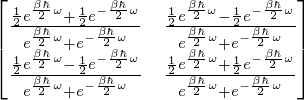

In [126]:
w, b, hb = symbols('omega beta hbar')
H = -(hb*w/2)*pauli(1)
rho_gibbs(b, H)

## Teorema (forma exponencial para operadores unitários)
Seja $H:\mathcal{H}\rightarrow\mathcal{H}$ um operador Hermitiano e $\theta\in\mathbb{R}$, então
\begin{equation}
U := e^{i\theta H}
\end{equation}
é um operador unitário.
### Prova
Se $H=\sum_{h}hP_{h}$. Então $i\theta H=\sum_{h}i\theta hP_{h}$. Assim
\begin{equation}
U=e^{i\theta H}=\sum_{h}e^{i\theta h}P_{h}
\end{equation}
e
\begin{equation}
U^{\dagger}=\sum_{h}(e^{i\theta h})^{*}P_{h}^{\dagger} = \sum_{h}e^{-i\theta h}P_{h}.
\end{equation}
Por conseguinte,
\begin{equation}
UU^{\dagger} = \sum_{h}e^{i\theta h}P_{h}\sum_{h'}e^{-i\theta h'}P_{h'} = \sum_{h,h'}e^{i\theta(h-h')}P_{h}P_{h'} = \sum_{h}P_{h} = \mathbb{I}_{\mathcal{H}}.
\end{equation}
__Exercício:__ Verifique que $U^{\dagger}U=\mathbb{I}_{\mathcal{H}}$. <br>
Assim completamos a prova do teorema.

## Exponencial de operadores comutantes
Se dois operadores lineares $A$ e $B$ comutam, i.e., $[A,B]=\mathbb{0}_{\mathcal{H}}$, então podemos escrever as decomposições espectrais $A=\sum_{j}a_{j}P_{j}$ e $B=\sum_{j}b_{j}P_{j}$. Assim $A+B=\sum_{j}(a_{j}+b_{j})P_{j}$ e
\begin{align}
e^{A}e^{B} & = \sum_{j}e^{a_{j}}P_{j}\sum_{k}e^{b_{k}}P_{k} = \sum_{j,k}e^{a_{j}}e^{b_{k}}P_{j}P_{k} = \sum_{j,k}e^{a_{j}+b_{k}}\delta_{j,k}P_{j} = \sum_{j}e^{a_{j}+b_{j}}P_{j} \\
& = e^{A+B}.
\end{align}

## Exponencial de operadores não comutantes
Se dois operadores lineares $A$ e $B$ não comutam, i.e., $[A,B]\ne\mathbb{0}_{\mathcal{H}}$, teremos
\begin{matrix}
e^{A+B}\ne e^{A}e^{B}.
\end{matrix}

### Fórmula de Zassenhaus
Seja $L(A,B)$ a álgebra de Lie livre gerada por $A$ e $B$. Então [arXiv:1204.0389]
\begin{equation}
e^{A+B} = e^{A}e^{B}\Pi_{j=2}^{\infty}e^{C_{j}(A,B)},
\end{equation}
com $C_{j}(A,B)\in L(A,B)$ é um polinômio homogêneo de Lie de grau $j$ em $A$ e $B$. Explicitamente teremos
\begin{align}
C_{2} & = -\frac{1}{2}[A,B], \\
C_{3} & = -\frac{1}{6}\left([[A,B],A]+2[[A,B],B]\right), \\
C_{4} & = -\frac{1}{24}\left([[[A,B],A],A]+3[[[A,B],A],B]+3[[[A,B],B],B]\right), \\
&\vdots.
\end{align}

#### Caso especial
Para operadores tais que $[B,[A,B]]=[A,[A,B]]=\mathbb{0}$ teremos que
\begin{equation}
e^{A+B} = e^{A}e^{B}e^{-[A,B]/2}.
\end{equation}
Um exemplo importante de tais operadores são os operadores de criação, $a$, e de aniquilação, $a^{\dagger}$, do oscilador harmônico quântico, para os quais $[a,a^{\dagger}]=\mathbb{I}$.

### Fórmula de Trotter-Suzuki
Outra equação que é usada frequentemente na literatura é a fórmula de Trotter [J. Math. Phys. 26, 601 (1985)]:
\begin{equation}
e^{A+B}=\lim_{N\rightarrow\infty}\left(e^{A/N}e^{B/N}\right)^{N}.
\end{equation}